In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
df.shape

(10000, 14)

In [19]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [20]:
df.drop(
    ["RowNumber", "CustomerId", "Surname"],
    inplace=True,
    axis=1
)

In [21]:
df = pd.get_dummies(df, ["Geography", "Gender"], drop_first=True)

In [22]:
df.nunique()

CreditScore           460
Age                    70
Tenure                 11
Balance              6382
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary      9999
Exited                  2
Geography_Germany       2
Geography_Spain         2
Gender_Male             2
dtype: int64

In [23]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


In [24]:
df.drop(
    ["EstimatedSalary", "HasCrCard", "NumOfProducts", "Tenure", "CreditScore"],
    inplace=True,
    axis=1
)

In [25]:
df.corr()

,Age,Balance,IsActiveMember,Exited,Geography_Germany,Geography_Spain,Gender_Male
Age,1.000000,0.028308,0.085472,0.285323,0.046897,-0.001685,-0.027544
Balance,0.028308,1.000000,-0.010084,0.118533,0.401110,-0.134892,0.012087
IsActiveMember,0.085472,-0.010084,1.000000,-0.156128,-0.020486,0.016732,0.022544
Exited,0.285323,0.118533,-0.156128,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.046897,0.401110,-0.020486,0.173488,1.000000,-0.332084,-0.024628
Geography_Spain,-0.001685,-0.134892,0.016732,-0.052667,-0.332084,1.000000,0.016889
Gender_Male,-0.027544,0.012087,0.022544,-0.106512,-0.024628,0.016889,1.000000


In [26]:
df.describe()

,Age,Balance,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,76485.889288,0.515100,0.203700
std,10.487806,62397.405202,0.499797,0.402769
min,18.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000
50%,37.000000,97198.540000,1.000000,0.000000
75%,44.000000,127644.240000,1.000000,0.000000
max,92.000000,250898.090000,1.000000,1.000000


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['Exited'], axis=1)
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(
    activation='logistic',
    hidden_layer_sizes=(32, 16),
    max_iter=1000,
    solver='adam',
    learning_rate='adaptive'
)
model.fit(X_train, y_train)

,hidden_layer_sizes,"(32, ...)"
,activation,'logistic'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'adaptive'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


In [33]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print(f"Confusion Matrix {confusion_matrix(y_true=y_test, y_pred=y_pred)}")
print(f"Classification Report \n {classification_report(y_true=y_test, y_pred=y_pred)}")

Confusion Matrix [[2313   85]
 [ 394  208]]
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.96      0.91      2398
           1       0.71      0.35      0.46       602

    accuracy                           0.84      3000
   macro avg       0.78      0.66      0.69      3000
weighted avg       0.83      0.84      0.82      3000



<Axes: >

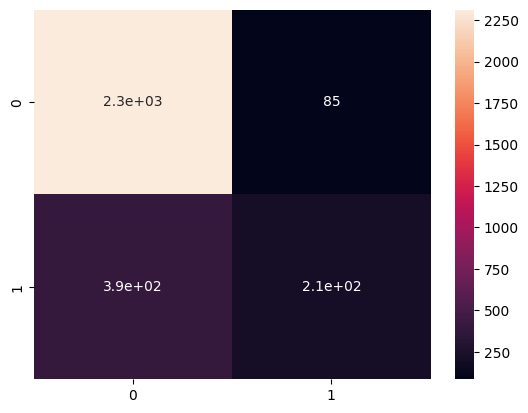

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True)

In [38]:
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(max_iter=1000, solver='adam', learning_rate='adaptive', random_state=42)
# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (32, 16), (64, 32), (128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],   # L2 regularization term
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # use all CPU cores
    verbose=2,          # show progress
    scoring='accuracy'
)

In [39]:
grid_search.fit(X_train, y_train)

# Show best results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'batch_size': 32, 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.01}
Best CV Accuracy: 0.8379997485257106
Test Accuracy: 0.8333333333333334
